## 통계계산특론I (Computational Statistics) 
## Dec 5, 2022
## Final Team Project

# Graph Coloring Algorithms Codes

We are going to apply three algorithms to three types of simulations.

1. Greedy

2. Ant Col

3. Backtracking


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import networkx as nx
import random 
import time 
import itertools
import random 

import warnings
warnings.filterwarnings( 'ignore' )

# plot font_size 조정 
sns.set_context("poster")

# 색상 팔레트 불러오기
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
color_palette = list(mcolors.BASE_COLORS) + list(mcolors.TABLEAU_COLORS) + list(mcolors.CSS4_COLORS)
# len(color_palette)  # 총 166개의 색상이 존재 
# print(color_palette[:15])  # 첫 15개만 확인

## Define Functions

In [2]:
def addEdge(adj, v, w):  # adj: adj. matrix, v: 연결 출발점 vertex, w: 연결 종료점 vertex 
      
    adj[v].append(w)
    adj[w].append(v)  # Note: the graph is undirected | if the graph is NOT undirected, delete this code. 
    
    return adj
  
# Assigns colors (starting from 0) to all
# vertices and prints the assignment of colors
def greedyColoring(adj, V):  # adj: adj. matrix, V: # of vertices  
    
    # Make empty list to store the 'result'
    ## why filling all values '-1' : the color starts from 0. 
    result = [-1] * V
  
    # Assign the first color to first vertex
    result[0] = 0 
  
    # A temporary array to store the available colors. 
    ## True value of available[cr] would mean that the color(cr) is assigned to one of its adjacent vertices
    available = [False] * V
  
    # Assign colors to remaining V-1 vertices
    for u in range(1, V):
          
        # Process all adjacent vertices and
        # flag their colors as unavailable
        for i in adj[u]:
            if (result[i] != -1):
                available[result[i]] = True
  
        # Find the first available color
        cr = 0
        while cr < V:
            if (available[cr] == False):
                break
              
            cr += 1
              
        # Assign the found color
        result[u] = cr 
  
        # Reset the values back to false 
        # for the next iteration
        for i in adj[u]:
            if (result[i] != -1):
                available[result[i]] = False
  
    # Print the result
    for u in range(V):
        print("Vertex", u, " --->  Color", result[u])  

### 0. Define the Function Counting Number Of Items in Dictionary 

In [3]:
def CountNumOfItems(d):  # d: dictionary 
    
    values_list = [item for item in d.values()]
    notunique_values_list = list(itertools.chain(*values_list))
#     unique_values_list = set(notunique_values_list)
    
    return len(notunique_values_list)

### 1. Define Greedy Function

In [4]:
def greedy(G, n): # G: adj. graph, n: # of nodes 
    
    start=time.time()
    
    # inisiate the name of node 
    node = list(range(0,n))
    t_={}
    
    for i in range(len(G)): 
        t_[node[i]] = i
    
    # count degree of all node.
    degree =[]
    for i in range(len(G)):
        degree.append(sum(G[i]))

    # inisiate the posible color 
    colorDict = {}
    for i in range(len(G)):
        colorDict[node[i]]=list(range(0,n))
    
    
    # sort the node depends on the degree
    sortedNode = []
    indeks = [] 
    colorDict_flow = [] 

    # use selection sort
    for i in range(len(degree)):
        _max = 0
        j = 0
        for j in range(len(degree)):
            if j not in indeks:
                if degree[j] > _max:
                    _max = degree[j]
                    idx = j
        indeks.append(idx)
        sortedNode.append(node[idx])

    # The main process
    theSolution={}
    iter_num = 0 
    
    for n in sortedNode:
        setTheColor = colorDict[n]
        theSolution[n] = setTheColor[0]
        adjacentNode = G[t_[n]]
        for j in range(len(adjacentNode)):
            if adjacentNode[j]==1 and (setTheColor[0] in colorDict[node[j]]):
                colorDict[node[j]].remove(setTheColor[0])
        # count the iter_num 
        iter_num += 1
            
        # for steps 
#         print(colorDict)   ################## greedy 이해하기 위해서 이 부분 확인 
        colorDict_flow.append( CountNumOfItems(colorDict) )

    
    final_color_num = max(theSolution.values())+1
    color_num_flow = colorDict_flow
    iter_time = time.time()-start

    # Print the results 
    print("Number of Colors used: ", max(theSolution.values())+1)
    print("Number of Iterations: ", iter_num) 
    print("Computation time: ", f"{time.time()-start:.4f} sec")
#     print("Colors_Flow: ", colorDict_flow)
    
    # Final Return: 함수의 output 
    return_dict ={'theSolution': theSolution, 'final_color_num': final_color_num, 
                  'color_num_flow': color_num_flow, 'iter_num': iter_num, 'iter_time': iter_time}
    
    return return_dict

### 2. Define AntCol Function

In [5]:
class Ant:
    # create new ant
    # alpha: the relative importance of pheromone (si_ij)
    # beta: the relative importance of heuristic value (n_ij)
    def __init__(self, alpha=1, beta=3):
        self.graph = None
        self.colors = {}
        self.start = None
        self.visited = []
        self.unvisited = []
        self.alpha = alpha
        self.beta = beta
        self.distance = 0 # number of used colors on a valid solution
        self.number_colisions = 0 # only for consistency check, should be always 0
        self.colors_available = []
        self.colors_assigned = {}

    # reset everything for a new solution
    # start: starting node in g (random by default)
    # return: Ant
    def initialize(self, g, colors, start=None):
        self.colors_available = sorted(colors.copy())
        
        # init assigned colors with None
        keys = [n for n in g_nodes_int]
        self.colors_assigned = {key: None for key in keys}
        
        # start node
        if start is None:
            self.start = random.choice(g_nodes_int)
        else:
            self.start = start
        
        self.visited = []
        self.unvisited = g_nodes_int.copy()
        
        # assign min. color number to the start node
        if (len(self.visited)==0):
            self.assign_color(self.start, self.colors_available[0])
        return self

    # assign color to node and update the node lists
    def assign_color(self, node, color):
        self.colors_assigned[node] = color
        self.visited.append(node)
        self.unvisited.remove(node)
    
    # assign a color to each node in the graph
    def colorize(self):
        len_unvisited = len(self.unvisited)
        tabu_colors = []
        # assign color to each unvisited node
        for i in range(len_unvisited):
            next = self.next_candidate()
            tabu_colors = []
            # add colors of neighbours to tabu list
            for j in range(number_nodes):
                if (adj_matrix[next,j]==1):
                    tabu_colors.append(self.colors_assigned[j])
            # assign color with the smallest number that is not tabu
            for k in self.colors_available:
                if (k not in tabu_colors):
                    self.assign_color(next,k)
                    break
        # save distance of the current solution
        self.distance = len(set(self.colors_assigned.values()))
        # consitency check
        ##self.number_colisions = self.colisions()
        ##print('colisions: ' + str(self.number_colisions))
        
    # return the number of different colors among the neighbours of node
    def dsat(self, node=None):
        if node is None:
            node = self.start
        col_neighbors = []
        for j in range(number_nodes):
            if (adj_matrix[node, j]==1):
                col_neighbors.append(self.colors_assigned[j])
        return len(set(col_neighbors))

    # return the pheromone trail of the pair (node,adj_node)
    def si(self, node, adj_node):
        return phero_matrix[node, adj_node]

    # select next candidate node according to the transition rule
    def next_candidate(self):
        if (len(self.unvisited)==0):
           candidate = None
        elif (len(self.unvisited)==1):
            candidate = self.unvisited[0]
        else:
            max_value = 0
            heuristic_values = []
            candidates = []
            candidates_available = []
            for j in self.unvisited:
                heuristic_values.append((self.si(self.start, j)**self.alpha)*(self.dsat(j)**self.beta))
                candidates.append(j)
            max_value = max(heuristic_values)
            for i in range(len(candidates)):
                if (heuristic_values[i] >= max_value):
                   candidates_available.append(candidates[i])
            candidate = random.choice(candidates_available)
        self.start = candidate
        return candidate
    
    # return your own pheromone trail
    def pheromone_trail(self):
        phero_trail = np.zeros((number_nodes, number_nodes), float)
        for i in g_nodes_int:
            for j in g_nodes_int:
                if (self.colors_assigned[i]==self.colors_assigned[j]):
                    phero_trail[i,j] = 1
        return phero_trail

    # consistency check --> should always return 0
    def colisions(self):
        colisions = 0
        for key in self.colors_assigned:
            node = key
            col = self.colors_assigned[key]
            # check colors of neighbours
            for j in range(number_nodes):
                if (adj_matrix[node, j]==1 and self.colors_assigned[j]==col):
                    colisions = colisions+1
        return colisions
        
# take input from the txt.file and create an undirected graph
def create_graph(path):
    global number_nodes
    g = nx.Graph()
    f = open(path)
    n = int(f.readline())
    for i in range(n):
        graph_edge_list = f.readline().split()
        # convert to int
        graph_edge_list[0] = int(graph_edge_list[0])
        graph_edge_list[1] = int(graph_edge_list[1])
        # build graph
        g.add_edge(graph_edge_list[0], graph_edge_list[1])
    return g


#draw the graph and display the weights on the edges
def draw_graph(g, col_val):
	pos = nx.spring_layout(g)
	values = [col_val.get(node, 'blue') for node in g.nodes()]
	nx.draw(g, pos, with_labels = True, node_color = values, edge_color = 'black' ,width = 1, alpha = 0.7)  #with_labels=true is to show the node number in the output graph

# initiate a selection of colors for the coloring and compute the min. number of colors needed for a proper coloring
def init_colors(g):
    # grundy (max degree+1)
    colors = []
    grundy = len(nx.degree_histogram(g))
    for c in range(grundy):
       colors.append(c)
    return colors

# create a pheromone matrix with init pheromone values: 1 if nodes not adjacent, 0 if adjacent
def init_pheromones(g):
    phero_matrix = np.ones((number_nodes, number_nodes), float)
    for node in g:
        for adj_node in g.neighbors(node):
            phero_matrix[node, adj_node] = 0
    return phero_matrix

# calculate the adjacency matrix of the graph    
def adjacency_matrix(g):
    adj_matrix = np.zeros((number_nodes, number_nodes), int)
    for node in g_nodes_int:
        for adj_node in g.neighbors(node):
            adj_matrix[node, adj_node] = 1
    return adj_matrix

# create new colony
def create_colony():
    ants = []
    ants.extend([Ant().initialize(g, colors) for i in range(number_ants)])
    return ants

# apply decay rate to the phero_matrix
def apply_decay():
    for node in g_nodes_int:
        for adj_node in g_nodes_int:
            phero_matrix[node, adj_node] = phero_matrix[node, adj_node]*(1-phero_decay)


# select colony's best solution
# update pheromone_matrix according to the elite solution
# return elite solution (coloring) with its distance (number of used colors)
def update_elite():
    global phero_matrix
    # select elite
    best_dist = 0
    elite_ant = None
    ants_num = 0  
    allants_dist = []    
    
    for ant in ants:
        if (best_dist==0):
            best_dist = ant.distance
            elite_ant = ant
        elif (ant.distance < best_dist):
            best_dist = ant.distance
            elite_ant = ant
            
        ants_num += 1  
        allants_dist.append(ant.distance)  # 동일 iteration에서 모든 ant들의 거리(사용한 색깔 수) 저장 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        
    # update global phero_matrix
    elite_phero_matrix = elite_ant.pheromone_trail()
    phero_matrix = phero_matrix + elite_phero_matrix
    return elite_ant.distance, elite_ant.colors_assigned, ants_num, allants_dist # @@@@@@@@@@@@@@@@@@@@@@@@@@@ 
    #iter_num랑 allants_dist 추가 !!!!!! 


# ------------- entry point -------------
# param input_graph - a networkx graph to be colored (node coloring)
# param num_ants - number of ants in the colony
# param iter - number of iterations to be performed
# param a - relative importance of elite pheromones
# param b - relative importance of heuristic value (DSAT)
# param decay - evaporation of pheromones after each iteration
def solve(input_graph, num_ants=10, iter=10, a=1, b=3, decay=0.8):
    global g # graph to be colored (a networkx graph)
    global number_nodes
    global g_nodes_int
    global number_ants
    global alpha
    global beta
    global phero_decay
    global adj_matrix
    global phero_matrix
    global colors
    global ants
    
    
    start=time.time()  
    
    # params
    g = input_graph 
    number_ants=num_ants
    number_iterations=iter
    alpha = a # relative importance of pheromone (si_ij)
    beta = b # relative importance of heuristic value (n_ij)
    phero_decay=decay # rate of pheromone decay
    
    # results
    final_solution = {} # coloring of the graph
    final_costs = 0 # number of colors in the solution
    
    # init    
    number_nodes = nx.number_of_nodes(g)
    g_nodes_int = []
    for node in g.nodes():  #nodes_iter -> nodes
        g_nodes_int.append(node)
    g_nodes_int = list(map(int, sorted(g_nodes_int)))
    adj_matrix = adjacency_matrix(g)
    colors = init_colors(g)
    phero_matrix = init_pheromones(g)
    
    allants_med_dist_flow = []

    # ACO_GCP daemon
    for i in range(number_iterations):
        
        # create colony
        ants = []
        ants = create_colony()
        
        # let colony find solutions
        for ant in ants:
            ant.colorize()
        # apply decay rate
        apply_decay()
        # select elite and update si_matrix
        elite_dist, elite_sol, elite_ants_num, allants_dist = update_elite()
        # estimate global solution so far
        if (final_costs==0):
            final_costs = elite_dist
            final_solution = elite_sol
        elif (elite_dist<final_costs):
            final_costs = elite_dist
            final_solution = elite_sol
        
        allants_med_dist = np.mean(allants_dist).round()  # 동일 iteration에서 개미들의 dist 중간값
        allants_med_dist_flow.append(allants_med_dist)  # 중간값 append한 리스트
        
#         print('niter_num: ', i)  # for steps: AntCol 과정 알려면 이 부분 주석풀기 
#         print('allants_dist')  
        print(allants_dist)  
#         print('allants_med_dist')  
#         print(allants_med_dist_flow)  
        print('iteration ', i, 'done')
        

    iter_time = time.time()-start  


    # Print the results 
    print("Number of Colors used: ", max(final_solution.values())+1)
    print("Number of Iterations: ", number_iterations) 
    print("Computation time: ", f"{iter_time:.4f} sec")
#     print("Colors_Flow: ", elite_dist_flow)

    return_dict ={'theSolution': final_solution, 'final_costs': final_costs, 'final_color_num': max(final_solution.values())+1, 
                  'color_num_flow': allants_med_dist_flow, 'iter_num': number_iterations, 'iter_time': iter_time,
                 'ants_num': elite_ants_num}        
    return return_dict

# global vars
g = None # graph to be colored
number_nodes = 0
g_nodes_int = []
number_ants = 0
alpha = 0
beta = 0
phero_decay = 0
adj_matrix = np.zeros((number_nodes, number_nodes), int)
phero_matrix = np.ones((number_nodes, number_nodes), float)
colors = []
ants = []

### 3. Define Backtracking Algorithm

In [ ]:
# A utility function to check
# if the current color assignment
# is safe for vertex v
def isSafe(graph, v, colour, c):
    for i in range(len(graph)):
        if graph[v][i] == 1 and colour[i] == c:
            return False
    return True

# A recursive utility function to solve m
# coloring  problem
def graphColourUtil(graph, m, colour, v):
    if v == len(graph):
        return True

    for c in range(1, m + 1):
        if isSafe(graph, v, colour, c) == True:
            colour[v] = c
            if graphColourUtil(graph, m, colour, v + 1) == True:
                return True
            colour[v] = 0


def Backtracking(graph, m):
    
    start=time.time()
    
    colour = [0] * len(graph)
    if graphColourUtil(graph, m, colour, 0) == None:
        return False

    # Print the solution
    print("Solution exist and Following are the assigned colours:")
    iter_num=0
    for c in colour:
        print(c, end=' ')
    
    print("Number of Colors used : \n", len(set(colour))) 
    print("Number of Iterations : \n", iter_num)
    print("Computation time : \n", f"{time.time()-start:.4f} sec")
    #return True, len(set(colour))          

## Simulation 1. 간단한 예시

### [Case 1] n=4 (simple graph)

In [6]:
import random 
random.seed(1886)
start=time.time()

# (n = 100, a = 1240)
n=4; G=np.zeros((n,n))

for i in range(0,n):
    for j in range(i+1,n):
        G[i,j]=random.choices(range(0,2), weights=[1,1])[0]

       
G = np.triu(G)
G += G.T - np.diag(G.diagonal())
print(G.sum()/2)
G

5.0


array([[0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.]])

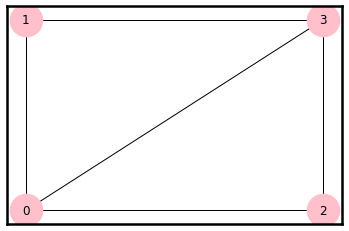

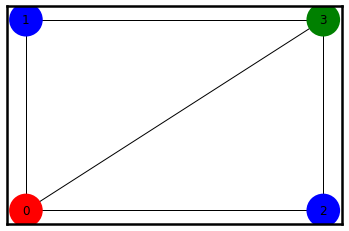

In [5]:
# network plot: 실제 그래프 시각화
G = nx.Graph()
G.add_edges_from([('0','1'),('0','2'),('0','3'),('1','3'),('2','3')])
pos = {'0':[1,1],  '1':[1,5],  '2':[5,1],  '3':[5,5]}
nx.draw_networkx(G,pos,node_size = 1000, node_color = 'pink')
plt.show();

# 0 : color2 / 1,2 : color0 / 3 : color1 /
color_map = ['red','blue','blue','green']
nx.draw_networkx(G,pos,node_size = 1000, node_color = color_map)
plt.show();

- 위 그래프는 그래프 컬러링 전, 아래 그래프는 그래프 컬링 이후이다. 
- 색칠된 그래프(아래)를 살펴보면, 인접 node는 색이 겹치지 않도록 색칠되었다는 것을 알 수 있다.

#### 1) Greedy Algorithm

Number of Colors used:  3
Number of Iterations:  4
Computation time:  0.0000 sec


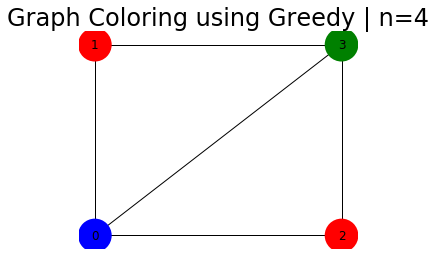

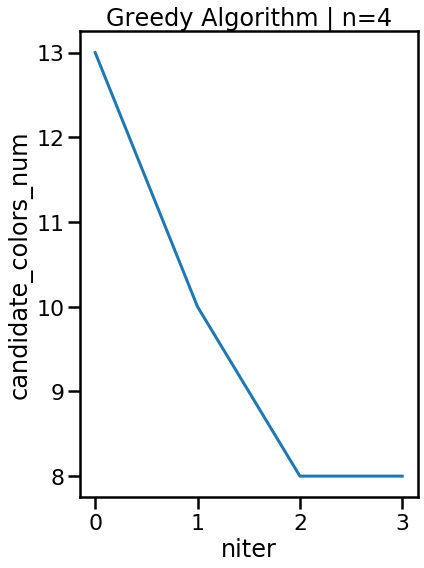

In [9]:
# Adjacent Matrix 정의 
G = [[ 0, 1, 1, 1],
     [ 1, 0, 0, 1],
     [ 1, 0, 0, 1],
     [ 1, 1, 1, 0]] 

# greedy 알고리즘 적용 
solutions = greedy(G, n=len(G))


# 시각화 

# 1) greedy 알고리즘으로 구한 Solution으로 그린 그래프 

## 색 id을 색상으로 변환 (ex. 1 -> red)
solution_gd = solutions['theSolution']
sorted_solution_gd = dict(sorted(solution_gd.items()))
color_values = list(sorted_solution_gd.values())
colors_greedy = [color_palette[color_id] for color_id in color_values]
colors_greedy

# 그리기 
plt.figure(figsize=(6,4))
ax = plt.gca()

G = nx.Graph()
G.add_edges_from([('0','1'),('0','2'),('0','3'),('1','3'),('2','3')])  #### 시간허락되면 이 부분 자동화하기 
nx.draw_networkx(G,pos,node_size = 1000, node_color = colors_greedy, ax=ax) 
ax.set_title('Graph Coloring using Greedy | n=4')
_ = ax.axis('off')


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num']), 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | n=4',
      xticks=color_num_flow_df['niter'])
fig.tight_layout();
plt.show();

#### 2) AntCol Algorithm

Number of Colors used:  3
Number of Iterations:  10
Computation time:  0.0080 sec


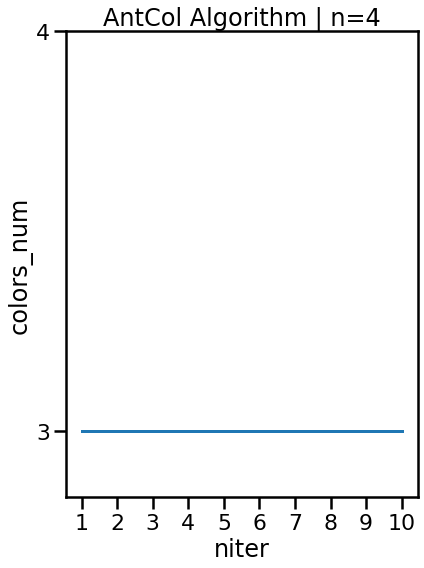

In [14]:
# Adjacent Matrix 정의 
G = nx.Graph()
G.add_edges_from([(0,1),(0,2),(0,3),(1,3),(2,3)])
pos = {0:[1,1],  1:[1,5],  2:[5,1],  3:[5,5]}

# AntCol 적용 
solutions = solve(G)

# 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num'])+1, 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='colors_num', title='AntCol Algorithm | n=4',
      xticks=color_num_flow_df['niter'], yticks=[3,4])
fig.tight_layout();
plt.show();

#### 3) Backtracking

In [42]:
start = time.time()
Backtracking(G,100)
print(f"{time.time()-start:.4f} sec")

Solution exist and Following are the assigned colours:
1 2 2 3 Number of Colors used : 
 3
Number of Iterations : 
 0
Computation time : 
 0.0008 sec
0.0012 sec


### [Case 2] n=9 (medium graph)

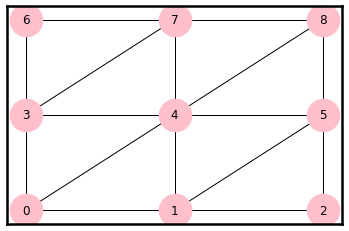

In [10]:
# network plot: 실제 그래프 시각화
G = nx.Graph()
G.add_edges_from([('0','1'),('0','3'),('0','4'),('1','2'),('1','4'),('1','5'),('2','5'),
                  ('3','4'),('3','6'),('3','7'),('4','5'),('4','7'),('4','8'),('5','8'),('6','7'),('7','8')])
pos = {'0':[1,1],  '1':[3,1],  '2':[5,1], 
       '3':[1,3],  '4':[3,3],  '5':[5,3],
       '6':[1,5],  '7':[3,5], '8':[5,5]}
nx.draw_networkx(G,pos,node_size = 1000, node_color = 'pink')
plt.show();

Coloring of graph 2 
Vertex 0  --->  Color 0
Vertex 1  --->  Color 1
Vertex 2  --->  Color 0
Vertex 3  --->  Color 1
Vertex 4  --->  Color 2
Vertex 5  --->  Color 3
Vertex 6  --->  Color 0
Vertex 7  --->  Color 3
Vertex 8  --->  Color 0


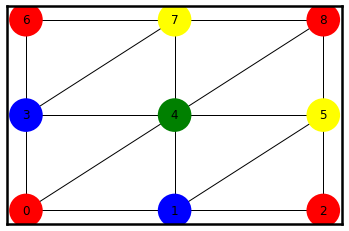

In [11]:
# 모범답안 

if __name__ == '__main__':
      
    g1 = [[] for i in range(9)]
    g1 = addEdge(g1, 0, 1)
    g1 = addEdge(g1, 0, 3)
    g1 = addEdge(g1, 0, 4)
    g1 = addEdge(g1, 1, 2)
    g1 = addEdge(g1, 1, 4)
    g1 = addEdge(g1, 1, 5)
    g1 = addEdge(g1, 2, 5)
    g1 = addEdge(g1, 3, 4)
    g1 = addEdge(g1, 3, 6)
    g1 = addEdge(g1, 3, 7)
    g1 = addEdge(g1, 4, 5)
    g1 = addEdge(g1, 4, 7)
    g1 = addEdge(g1, 4, 8)
    g1 = addEdge(g1, 5, 8)
    g1 = addEdge(g1, 6, 7)
    g1 = addEdge(g1, 7, 8)
    
    print("Coloring of graph 2 ")
    greedyColoring(g1, 9)

# 색칠한 network plot     
# 0,2,6,8 : color1(red) / 1,3 : color2(blue) / 4 : color3(green_) /5,7 : color4(yellow)
G = nx.Graph()
G.add_edges_from([('0','1'),('0','3'),('0','4'),('1','4'),('1','2'),('1','5'),('4','5'),('2','5'),
                  ('3','4'),('3','6'),('3','7'),('6','7'),('4','7'),('4','8'),('7','8'),('5','8')])
pos = {'0':[1,1],  '1':[3,1],  '2':[5,1], 
       '3':[1,3],  '4':[3,3],  '5':[5,3],
       '6':[1,5],  '7':[3,5], '8':[5,5]}
color_map = ['red','blue','blue','green','red','yellow','red','yellow','red'] 
nx.draw_networkx(G,pos,node_size = 1000, node_color = color_map)
plt.show(); 

#### 1) Greedy Algorithm

Number of Colors used:  3
Number of Iterations:  9
Computation time:  0.0000 sec


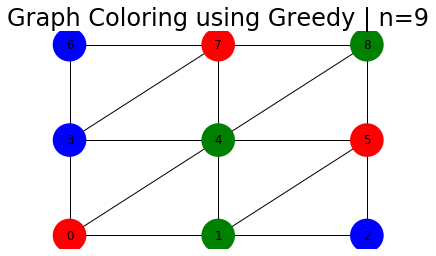

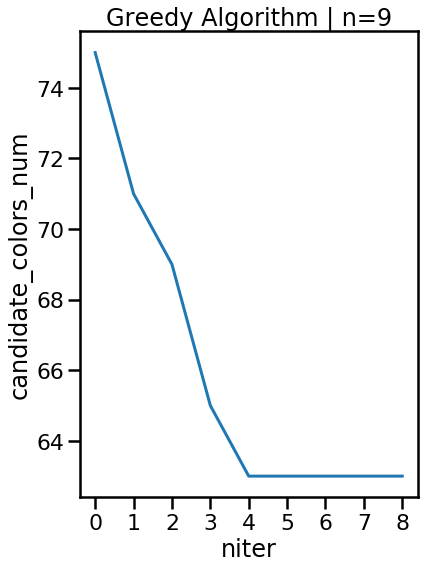

In [13]:
# Adjacent Matrix 정의 
G = [[ 0, 1, 0, 1, 1, 0, 0, 0, 0],
     [ 1, 0, 1, 0, 1, 1, 0, 0, 0],
     [ 0, 1, 0, 0, 0, 1, 0, 0, 0],
     [ 1, 0, 0, 0, 1, 0, 1, 1, 0],
     [ 1, 1, 0, 1, 0, 1, 0, 1, 1],
     [ 0, 1, 1, 0, 1, 0, 0, 0, 1],
     [ 0, 0, 0, 1, 0, 0, 0, 1, 0],
     [ 0, 0, 0, 1, 1, 0, 1, 0, 1],
     [ 0, 0, 0, 0, 0, 1, 0, 1, 0]]


# greedy 알고리즘 적용 
solutions = greedy(G, n=len(G))


# 시각화 

# 1) greedy 알고리즘으로 구한 Solution으로 그린 그래프 

## 색 id을 색상으로 변환 (ex. 1 -> red)
solution_gd = solutions['theSolution']
sorted_solution_gd = dict(sorted(solution_gd.items()))
color_values = list(sorted_solution_gd.values())
colors_greedy = [color_palette[color_id] for color_id in color_values]
colors_greedy

# 그리기 
plt.figure(figsize=(6,4))
ax = plt.gca()

G = nx.Graph()
G.add_edges_from([('0','1'),('0','3'),('0','4'),('1','4'),('1','2'),('1','5'),('4','5'),('2','5'),
                  ('3','4'),('3','6'),('3','7'),('6','7'),('4','7'),('4','8'),('7','8'),('5','8')])  #### 시간허락되면 이 부분 자동화하기 
nx.draw_networkx(G,pos,node_size = 1000, node_color = colors_greedy, ax=ax) 
ax.set_title('Graph Coloring using Greedy | n=9')
_ = ax.axis('off')


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num']), 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | n=9',
      xticks=color_num_flow_df['niter'])
fig.tight_layout();


#### 2) AntCol Algorithm

Number of Colors used:  3
Number of Iterations:  10
Computation time:  0.0380 sec


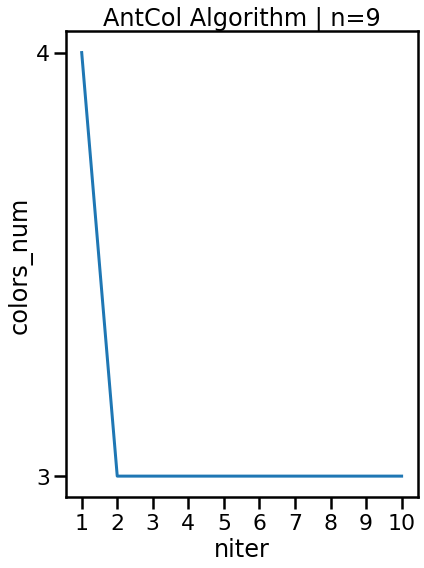

In [11]:
# Adjacent Matrix 정의 
G = nx.Graph()
G.add_edges_from([(0,1),(0,3),(0,4),(1,2),(1,4),(1,5),(2,5),
                  (3,4),(3,6),(3,7),(4,5),(4,7),(4,8),(5,8),(6,7),(7,8)])

pos = {0:[1,1],  1:[3,1],  2:[5,1], 
       3:[1,3],  4:[3,3],  5:[5,3],
       6:[1,5],  7:[3,5],  8:[5,5]}

# AntCol 적용 
solutions = solve(G)

# 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num'])+1, 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='colors_num', title='AntCol Algorithm | n=9',
      xticks=color_num_flow_df['niter'])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # y축 숫자 int만 출력
fig.tight_layout();
plt.show();

#### 3) Backtracking Algorithm

In [117]:
start=time.time()
Backtracking(G,3)
print(f"{time.time()-start:.4f} sec")

Solution exist and Following are the assigned colours:
1 2 3 2 3 1 3 1 2 Number of Colors used : 
 3
Number of Iterations : 
 0
Computation time : 
 0.0009 sec
0.0012 sec


## Simulation 2. n는 100으로 고정, a만 점차적으로 증가하는 그래프
- n: node 개수, a: edge 개수 이다.
- n=100으로 동일하고, seed를 고정하여 무작위로 a 값을 뽑아 graph를 만든다.
- simulation2 파트에서는 노드 개수가 100개이고, a 값은 로 4종류이다. 
- 그래프 시각화는 컴퓨팅 파워 부족으로 어렵기 때문에 생략하였다. 


- 이렇게 생성된 graph들에 대해 각각의 알고리즘은 어떠한 강점 혹은 약점이 있는지 알아보자.

### [Case 1] n=100, a=1638

In [20]:
# Adjacent Matrix 정의 
import random 
random.seed(1886)

n=100 
G=np.zeros((n,n))

for i in range(0,n):  # 무작위로 연결선(a) 생성 
    for j in range(i+1,n):
        G[i,j]=random.choices(range(0,2), weights=[2,1])[0]

G = np.triu(G)
G += G.T - np.diag(G.diagonal())
print('a = ', G.sum()/2)

a =  1638.0


#### 1) Greedy Algorithm

Number of Colors used:  15
Number of Iterations:  100
Computation time:  0.0169 sec


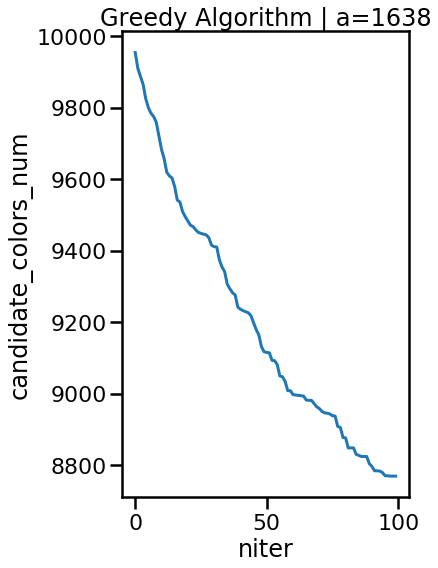

In [21]:
# 1) greedy 알고리즘 적용
solutions = greedy(G, n=len(G))


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num']), 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | a=1638',
      )
fig.tight_layout();

#### 2) AntCol Algorithm

[20, 19, 19, 19, 19, 20, 17, 19]
iteration  0 done
[18, 19, 19, 19, 18, 20, 18, 19]
iteration  1 done
[18, 18, 18, 18, 18, 18, 18, 18]
iteration  2 done
[18, 17, 18, 18, 18, 18, 18, 18]
iteration  3 done
[17, 17, 17, 17, 18, 17, 17, 17]
iteration  4 done
[17, 17, 17, 17, 17, 17, 17, 17]
iteration  5 done
[18, 17, 17, 17, 17, 17, 17, 17]
iteration  6 done
[17, 17, 17, 17, 17, 17, 17, 17]
iteration  7 done
[17, 18, 17, 17, 17, 17, 17, 17]
iteration  8 done
[17, 17, 17, 17, 17, 17, 17, 17]
iteration  9 done
[17, 17, 17, 17, 17, 17, 17, 17]
iteration  10 done
[17, 17, 17, 17, 17, 17, 19, 17]
iteration  11 done
[17, 17, 17, 17, 17, 18, 18, 17]
iteration  12 done
[17, 17, 18, 17, 17, 18, 17, 17]
iteration  13 done
[17, 17, 17, 17, 17, 17, 17, 17]
iteration  14 done
Number of Colors used:  17
Number of Iterations:  15
Computation time:  20.3623 sec


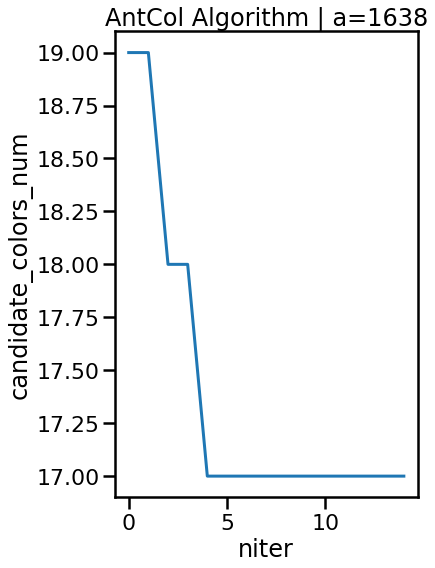

In [29]:
# AntCol 적용 
G = nx.Graph(G)
solutions1 = solve(G, num_ants=8, iter=15)

# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions1['iter_num']), 
                                  'colors_used': solutions1['color_num_flow']})
sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='AntCol Algorithm | a=1638',
      )
fig.tight_layout();

#### 3) Backtracking Algorithm 

In [67]:
start=time.time()
Backtracking(G,100)
print(f"{time.time()-start:.4f} sec")

Solution exist and Following are the assigned colours:
1 1 2 3 2 1 2 4 4 5 6 3 1 6 1 1 2 4 2 5 4 6 6 5 3 3 7 7 2 6 1 3 5 8 7 5 9 6 2 3 6 8 5 7 3 9 6 2 1 5 5 10 7 10 7 10 10 11 4 4 8 1 8 1 4 9 9 10 11 7 12 9 12 2 11 8 3 9 1 5 13 11 14 13 9 13 12 10 11 14 15 11 4 16 6 8 15 13 11 8 Number of Colors used : 
 16
Number of Iterations : 
 0
Computation time : 
 0.0228 sec
0.0231 sec


### [Case 2] n=100, a=2467

In [26]:
# Adjacent Matrix 정의 
import random 
random.seed(1886)

n=100 
G=np.zeros((n,n))

for i in range(0,n):  # 무작위로 연결선(a) 생성 
    for j in range(i+1,n):
        G[i,j]=random.choices(range(0,2), weights=[1,1])[0]

G = np.triu(G)
G += G.T - np.diag(G.diagonal())
print('a = ', G.sum()/2)

a =  2467.0


#### 1) Greedy Algorithm

Number of Colors used:  19
Number of Iterations:  100
Computation time:  0.0260 sec


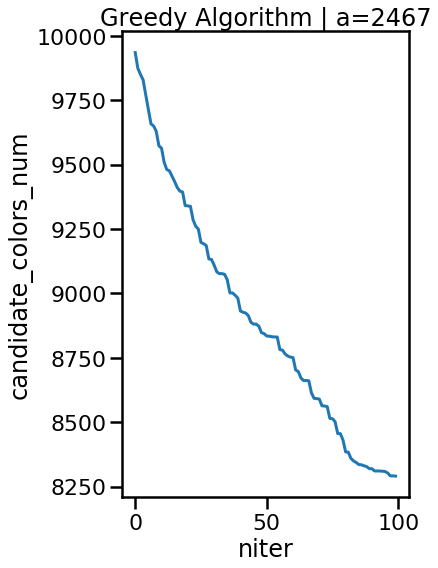

In [24]:
# 1) greedy 알고리즘 적용
solutions = greedy(G, n=len(G))


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num']), 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | a=2467',
      )
fig.tight_layout();

#### 2) AntCol Algorithm

[20, 20, 20, 19, 19, 20, 21, 18]
iteration  0 done
[19, 20, 19, 19, 18, 21, 19, 19]
iteration  1 done
[18, 19, 18, 18, 18, 18, 18, 18]
iteration  2 done
[18, 18, 18, 18, 18, 18, 18, 18]
iteration  3 done
[18, 19, 18, 20, 18, 18, 18, 19]
iteration  4 done
[18, 18, 18, 18, 18, 19, 18, 18]
iteration  5 done
[18, 19, 18, 18, 19, 18, 18, 18]
iteration  6 done
[18, 18, 18, 18, 18, 18, 18, 18]
iteration  7 done
[18, 18, 18, 18, 18, 18, 18, 18]
iteration  8 done
[18, 18, 18, 18, 18, 18, 18, 18]
iteration  9 done
[18, 18, 18, 18, 18, 18, 18, 18]
iteration  10 done
[18, 18, 18, 18, 18, 18, 18, 18]
iteration  11 done
[18, 18, 18, 18, 18, 18, 18, 18]
iteration  12 done
[18, 18, 18, 18, 19, 18, 18, 19]
iteration  13 done
[18, 18, 18, 18, 18, 18, 18, 18]
iteration  14 done
Number of Colors used:  18
Number of Iterations:  15
Computation time:  20.7811 sec


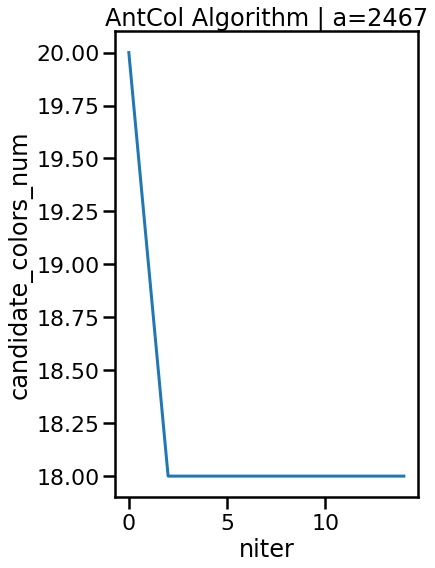

In [27]:
# AntCol 적용 
G = nx.Graph(G)
solutions2 = solve(G, num_ants=8, iter=15)

# 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions2['iter_num']), 
                                  'colors_used': solutions2['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='AntCol Algorithm | a=2467',
      )
fig.tight_layout();

#### 3) Backtracking Algorithm 

In [71]:
start=time.time()
Backtracking(G,100)
print(f"{time.time()-start:.4f} sec")

Solution exist and Following are the assigned colours:
1 1 2 3 2 3 2 4 1 5 6 4 1 7 3 4 2 1 3 5 5 7 6 8 3 9 2 10 10 6 4 1 4 9 10 5 11 6 11 8 12 9 6 7 8 11 13 8 14 6 5 12 13 15 9 7 14 16 17 10 8 8 6 15 15 11 16 12 5 12 11 13 17 14 1 15 16 16 14 18 10 17 19 19 18 3 19 18 15 10 12 20 16 20 21 9 2 20 14 9 Number of Colors used : 
 21
Number of Iterations : 
 0
Computation time : 
 0.0114 sec
0.0116 sec


### [Case 3] n=100, a=3751

In [30]:
# Adjacent Matrix 정의 
import random 
random.seed(1886)

n=100 
G=np.zeros((n,n))

for i in range(0,n):  # 무작위로 연결선(a) 생성 
    for j in range(i+1,n):
        G[i,j]=random.choices(range(0,2), weights=[1,3])[0]

G = np.triu(G)
G += G.T - np.diag(G.diagonal())
print('a = ', G.sum()/2)

a =  3751.0


#### 1) Greedy Algorithm

Number of Colors used:  33
Number of Iterations:  100
Computation time:  0.0250 sec


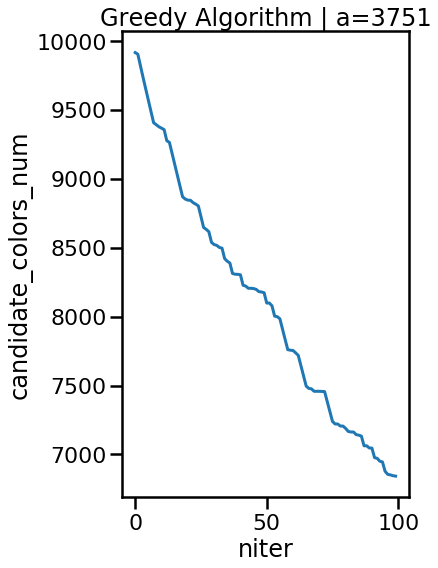

In [31]:
# 1) greedy 알고리즘 적용
solutions3 = greedy(G, n=len(G))


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions3['iter_num']), 
                                  'colors_used': solutions3['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | a=3751',
      )
fig.tight_layout();

#### 2) AntCol Algorithm

[32, 31, 33, 31, 33, 33, 32, 31]
iteration  0 done
[32, 32, 31, 32, 32, 31, 32, 31]
iteration  1 done
[31, 31, 31, 30, 32, 31, 32, 31]
iteration  2 done
[30, 29, 30, 30, 29, 29, 30, 30]
iteration  3 done
[29, 29, 29, 29, 29, 29, 29, 29]
iteration  4 done
[29, 29, 29, 29, 29, 29, 29, 29]
iteration  5 done
[29, 29, 29, 29, 29, 29, 29, 29]
iteration  6 done
[29, 29, 29, 29, 29, 29, 29, 29]
iteration  7 done
[29, 29, 29, 29, 29, 29, 29, 29]
iteration  8 done
[29, 29, 29, 29, 30, 29, 29, 29]
iteration  9 done
[29, 29, 29, 29, 29, 29, 29, 29]
iteration  10 done
[29, 30, 29, 29, 29, 29, 29, 29]
iteration  11 done
[29, 29, 29, 29, 29, 29, 29, 29]
iteration  12 done
[30, 29, 29, 29, 29, 29, 29, 29]
iteration  13 done
[29, 29, 29, 29, 29, 29, 29, 29]
iteration  14 done
Number of Colors used:  29
Number of Iterations:  15
Computation time:  26.0222 sec


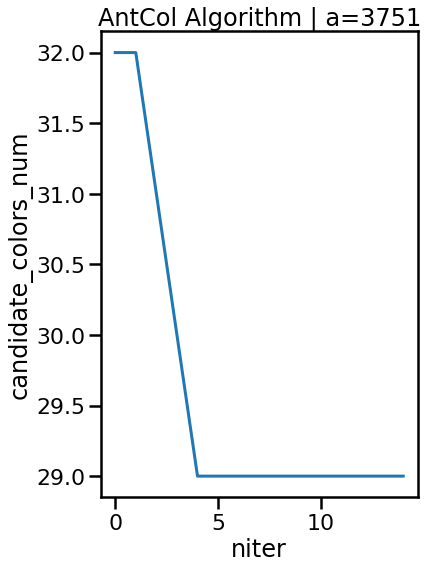

In [32]:
# AntCol 적용 
G = nx.Graph(G)
solutions3 = solve(G, num_ants=8, iter=15)

# 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions3['iter_num']), 
                                  'colors_used': solutions3['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='AntCol Algorithm | a=3751',
      )
fig.tight_layout();

#### 3) Backtracking Algorithm 

In [81]:
start=time.time()
Backtracking(G,100)
print(f"{time.time()-start:.4f} sec")

Solution exist and Following are the assigned colours:
1 1 2 3 4 4 3 5 2 6 7 5 2 8 6 7 7 1 9 9 8 6 10 11 11 9 12 12 13 10 14 1 5 15 16 13 14 17 7 17 11 13 16 18 19 3 10 20 21 19 11 14 6 22 15 18 23 24 12 21 23 8 4 22 7 17 24 6 20 18 25 15 25 26 27 28 10 28 29 27 30 28 31 30 20 26 19 29 26 32 14 33 12 13 34 32 24 27 6 4 Number of Colors used : 
 34
Number of Iterations : 
 0
Computation time : 
 0.0275 sec
0.0278 sec


### [Case 4] n=100, a=4179

In [35]:
# Adjacent Matrix 정의 
import random 
random.seed(1886)

n=100 
G=np.zeros((n,n))

for i in range(0,n):  # 무작위로 연결선(a) 생성 
    for j in range(i+1,n):
        G[i,j]=random.choices(range(0,2), weights=[1,5])[0]

G = np.triu(G)
G += G.T - np.diag(G.diagonal())
print('a = ', G.sum()/2)

a =  4179.0


#### 1) Greedy Algorithm

Number of Colors used:  38
Number of Iterations:  100
Computation time:  0.0190 sec


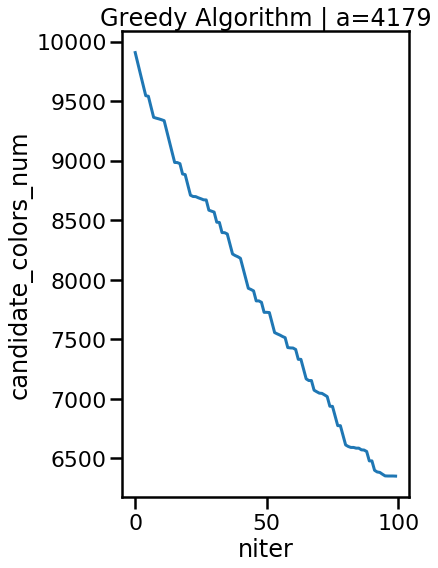

In [36]:
# 1) greedy 알고리즘 적용
solutions4 = greedy(G, n=len(G))


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions4['iter_num']), 
                                  'colors_used': solutions4['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | a=4179',
      )
fig.tight_layout();

#### 2) AntCol Algorithm

[38, 38, 38, 39, 38, 38, 39, 40]
iteration  0 done
[37, 38, 38, 38, 38, 36, 39, 37]
iteration  1 done
[36, 36, 35, 35, 35, 35, 35, 36]
iteration  2 done
[34, 35, 35, 35, 35, 34, 35, 35]
iteration  3 done
[36, 34, 34, 34, 34, 36, 34, 34]
iteration  4 done
[34, 34, 34, 34, 34, 34, 34, 34]
iteration  5 done
[34, 34, 34, 34, 34, 34, 34, 34]
iteration  6 done
[34, 34, 34, 34, 35, 34, 34, 34]
iteration  7 done
[34, 34, 34, 34, 34, 34, 34, 34]
iteration  8 done
[34, 34, 34, 34, 34, 34, 34, 34]
iteration  9 done
[34, 34, 34, 34, 34, 34, 34, 34]
iteration  10 done
[34, 34, 34, 34, 34, 34, 34, 34]
iteration  11 done
[34, 34, 34, 34, 34, 34, 34, 34]
iteration  12 done
[34, 34, 34, 34, 34, 34, 34, 34]
iteration  13 done
[34, 34, 34, 34, 34, 34, 34, 34]
iteration  14 done
Number of Colors used:  34
Number of Iterations:  15
Computation time:  22.8704 sec


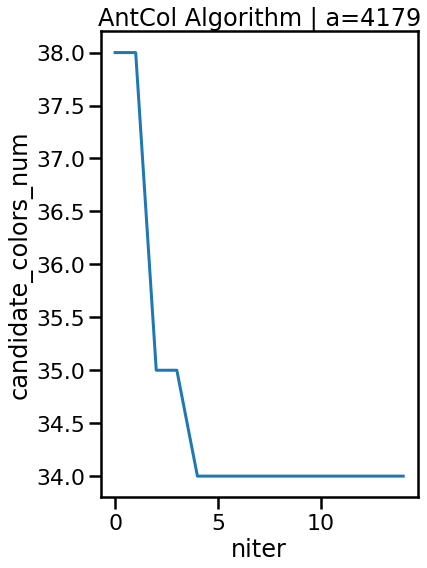

In [37]:
# AntCol 적용 
G = nx.Graph(G)
solutions4 = solve(G, num_ants=8, iter=15)

# 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions4['iter_num']), 
                                  'colors_used': solutions4['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='AntCol Algorithm | a=4179',
      )
fig.tight_layout();

#### 3) Backtracking Algorithm 

In [84]:
start=time.time()
Backtracking(G,100)
print(f"{time.time()-start:.4f} sec")

Solution exist and Following are the assigned colours:
1 2 2 3 4 5 1 3 6 7 8 4 8 6 9 10 7 11 3 12 13 4 9 5 11 12 10 14 15 14 13 16 17 2 17 14 18 5 16 19 8 20 6 21 15 18 21 19 20 20 22 23 24 22 25 26 15 9 10 27 28 29 25 12 26 30 24 7 3 27 30 17 29 27 31 32 23 28 26 33 32 34 31 35 33 11 36 8 37 35 38 39 35 34 40 39 18 41 36 42 Number of Colors used : 
 42
Number of Iterations : 
 0
Computation time : 
 0.0402 sec
0.0405 sec


## Simulation 3. n과 a가 점차적으로 증가하는 그래프
- n: node 개수, a: edge 개수 이다.
- seed를 고정하여 무작위로 n과 a 값을 뽑아 graph를 만든다.
- simulation 파트에서는 노드 개수가 최소 100개, 최대 1000개이다. 따라서 그래프 시각화는 컴퓨팅 파워 부족으로 어렵기 때문에 생략하였다. 


- 이렇게 생성된 graph들에 대해 각각의 알고리즘은 어떠한 강점 혹은 약점이 있는지 알아보자.

### [Case 1] n=100, a = 1638

In [9]:
# Adjacent Matrix 정의 
import random 
random.seed(1886)

n=100 
G=np.zeros((n,n))

for i in range(0,n):  # 무작위로 연결선(a) 생성 
    for j in range(i+1,n):
        G[i,j]=random.choices(range(0,2), weights=[2,1])[0]

G = np.triu(G)
G += G.T - np.diag(G.diagonal())
print('a = ', G.sum()/2)

a =  1638.0


#### 1) Greedy Algorithm

Number of Colors used:  15
Number of Iterations:  100
Computation time:  0.0250 sec


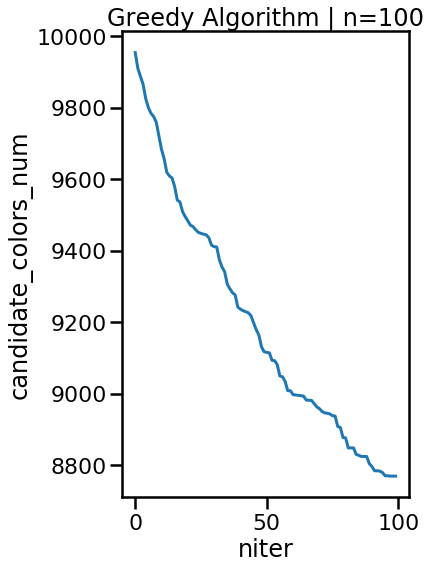

In [10]:
# 1) greedy 알고리즘 적용
solutions = greedy(G, n=len(G))


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num']), 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | n=100',
      )
fig.tight_layout();

#### 2) AntCol Algorithm

In [ ]:
# AntCol 적용 
G = nx.Graph(G)
solutions1 = solve(G, num_ants=8, iter=15)

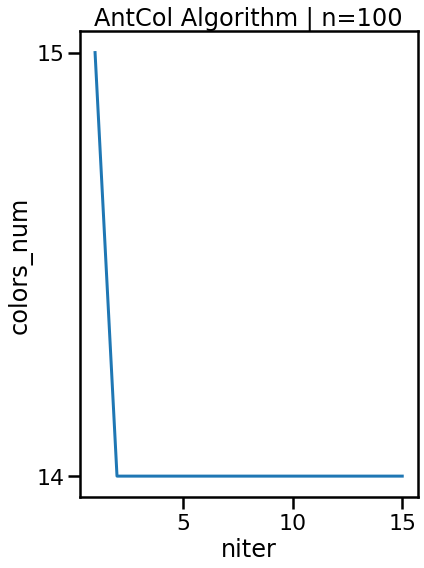

In [84]:
color_num_flow2 = [
    [14, 15, 14, 14, 14, 14, 15, 14],
    [14, 14, 14, 14, 15, 14, 14, 13],
    [13, 15, 13, 14, 14, 15, 14, 13],
    [13, 13, 13, 14, 15, 13, 13, 13],
    [13, 13, 13, 13, 13, 13, 13, 13],
    [15, 13, 14, 14, 13, 13, 14, 13],
    [14, 14, 13, 13, 14, 13, 13, 13],
    [13, 13, 13, 14, 13, 13, 13, 13],
    [13, 13, 14, 13, 13, 13, 13, 13],
    [15, 13, 13, 14, 15, 14, 13, 14],
    [13, 13, 13, 13, 13, 13, 13, 13],
    [13, 13, 13, 13, 13, 13, 13, 13],
    [13, 15, 13, 14, 13, 13, 14, 14],
    [13, 13, 13, 13, 13, 13, 13, 13],
    [13, 14, 14, 13, 13, 13, 14, 14]
]

# 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(15)+1, 
                                  'colors_used': np.min(color_num_flow2, axis=1)+1})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='colors_num', title='AntCol Algorithm | n=100',
      )
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # y축 숫자 int만 출력
fig.tight_layout();
plt.show();

#### 3) Backtracking Algorithm

In [95]:
Backtracking(G,100)

Solution exist and Following are the assigned colours:
1 1 2 3 2 1 2 4 4 5 6 3 1 6 1 1 2 4 2 5 4 6 6 5 3 3 7 7 2 6 1 3 5 8 7 5 9 6 2 3 6 8 5 7 3 9 6 2 1 5 5 10 7 10 7 10 10 11 4 4 8 1 8 1 4 9 9 10 11 7 12 9 12 2 11 8 3 9 1 5 13 11 14 13 9 13 12 10 11 14 15 11 4 16 6 8 15 13 11 8 Number of Colors used : 
 16
Number of Iterations : 
 0
Computation time : 
 0.0162 sec


### [Case 2] n=500, a = 41959

In [11]:
# Adjacent Matrix 정의 
import random 
random.seed(1886)

n=500
G=np.zeros((n,n))

for i in range(0,n):  # 무작위로 연결선(a) 생성 
    for j in range(i+1,n):
        G[i,j]=random.choices(range(0,2), weights=[2,1])[0]

G = np.triu(G)
G += G.T - np.diag(G.diagonal())
print('a = ', G.sum()/2)

a =  41959.0


#### 1) Greedy Algorithm

Number of Colors used:  48
Number of Iterations:  500
Computation time:  3.0040 sec


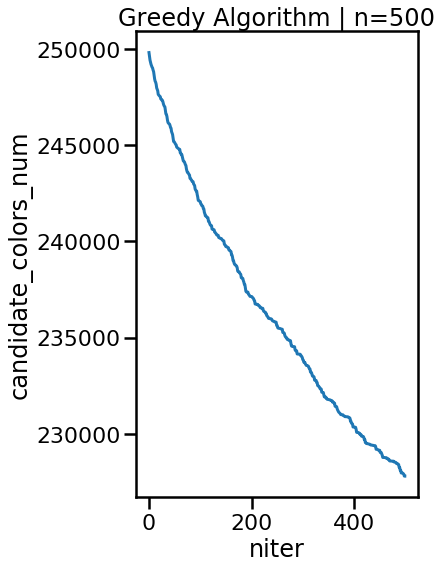

In [12]:
# 1) greedy 알고리즘 적용
solutions = greedy(G, n=len(G))


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num']), 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | n=500',
      )
fig.tight_layout();

#### 2) AntCol Algorithm

In [ ]:
# AntCol 적용 
G = nx.Graph(G)
solutions = solve(G, num_ants=5, iter=15)

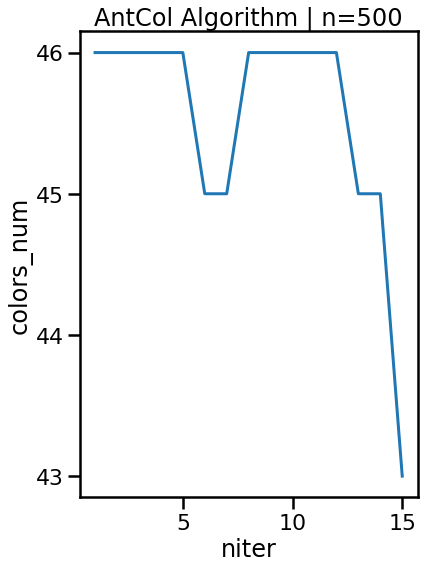

In [72]:
color_num_flow2 = [
    [47, 47, 46, 47, 46],
    [46, 46, 47, 46, 46],
    [46, 47, 48, 46, 47],
    [47, 46, 46, 46, 46],
    [49, 46, 47, 46, 48],
    [49, 48, 46, 45, 47],
    [45, 45, 46, 47, 45],
    [47, 46, 47, 47, 46],
    [46, 46, 46, 47, 46],
    [46, 49, 49, 47, 46],
    [48, 46, 48, 47, 46],
    [47, 46, 46, 48, 48],
    [46, 46, 45, 46, 46],
    [45, 46, 46, 45, 46],
    [44, 44, 44, 43, 44]]

# 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(15)+1, 
                                  'colors_used': np.min(color_num_flow2, axis=1)})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='colors_num', title='AntCol Algorithm | n=500',
      )
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # y축 숫자 int만 출력
fig.tight_layout();
plt.show();

#### 3) Backtracking Algorithm

In [101]:
Backtracking(G,1000)

Solution exist and Following are the assigned colours:
1 1 2 3 2 1 3 4 3 1 1 5 5 2 2 4 6 1 5 4 2 4 4 5 2 6 4 7 3 5 7 7 3 6 8 9 1 3 10 5 6 8 8 4 9 3 11 9 7 6 8 4 7 9 8 9 7 4 10 9 6 12 5 10 11 7 2 8 1 7 5 12 3 10 10 3 13 11 11 9 3 9 12 11 13 14 10 10 4 6 12 9 7 8 13 9 8 14 15 12 15 13 11 3 13 5 6 14 13 10 15 11 15 15 1 5 16 2 16 17 14 6 18 12 14 19 7 14 6 12 15 17 13 16 19 14 15 16 1 20 18 18 12 11 20 14 17 10 20 21 21 17 11 22 18 16 21 18 18 13 19 21 9 17 11 17 18 19 21 22 12 16 23 23 18 2 13 13 12 23 22 17 24 23 19 16 16 18 10 10 24 5 19 25 15 19 25 21 20 24 16 20 26 22 2 26 22 27 24 21 27 14 18 24 16 26 27 25 6 4 25 20 26 20 26 23 27 28 17 22 29 18 8 1 22 7 28 20 29 30 4 20 14 30 28 27 25 28 25 23 14 19 29 31 25 13 24 13 1 23 28 28 9 24 20 15 18 30 26 32 27 5 24 13 31 32 21 19 31 22 1 15 17 8 29 12 25 33 30 32 30 33 34 26 31 30 29 30 24 34 26 19 32 35 21 29 33 32 33 31 23 35 34 36 4 22 20 35 25 28 36 36 30 34 34 26 28 36 29 9 34 32 32 31 34 37 35 31 35 36 30 3 33 36 38 36 37 37 38 35 

### [Case 3] n=800, a = 107163

In [13]:
# Adjacent Matrix 정의 
import random 
random.seed(1886)

n=800
G=np.zeros((n,n))

for i in range(0,n):  # 무작위로 연결선(a) 생성 
    for j in range(i+1,n):
        G[i,j]=random.choices(range(0,2), weights=[2,1])[0]

G = np.triu(G)
G += G.T - np.diag(G.diagonal())
print('a = ', G.sum()/2)

a =  107163.0


#### 1) Greedy Algorithm

Number of Colors used:  68
Number of Iterations:  800
Computation time:  15.9070 sec


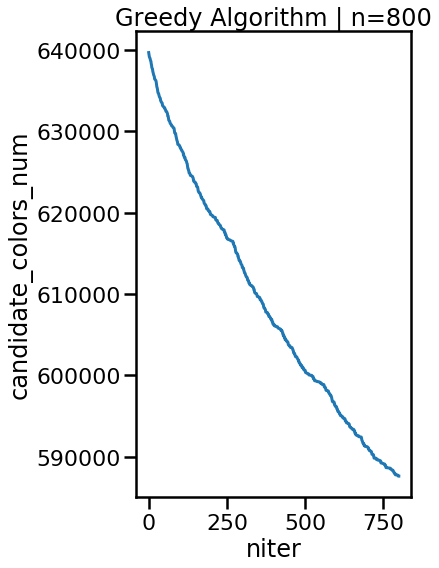

In [14]:
# 1) greedy 알고리즘 적용
solutions = greedy(G, n=len(G))


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num']), 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | n=800',
      )
fig.tight_layout();

#### 2) AntCol Algorithm

In [ ]:
# AntCol 적용 
G = nx.Graph(G)
solutions = solve(G, num_ants=5, iter=16)

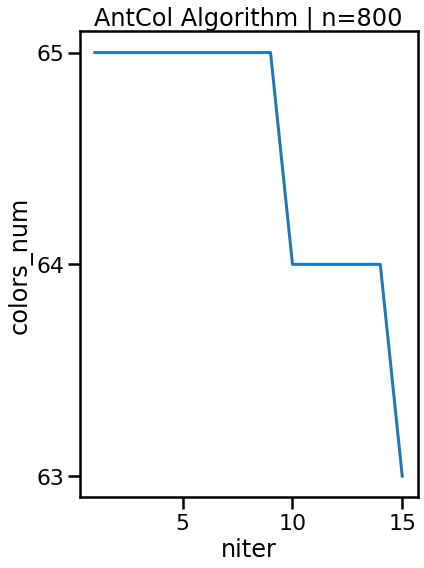

In [71]:
color_num_flow2 = [
    [66, 66, 65, 66, 66],
    [65, 65, 65, 67, 65],
    [65, 66, 65, 65, 65],
    [68, 66, 65, 67, 66],
    [65, 65, 66, 65, 65],
    [66, 65, 65, 65, 65],
    [68, 70, 65, 65, 67],
    [66, 65, 65, 65, 66],
    [65, 65, 65, 66, 65],
    [65, 64, 66, 65, 65],
    [64, 66, 65, 65, 64],
    [64, 65, 64, 65, 69],
    [64, 66, 64, 64, 64],
    [64, 66, 64, 64, 64],
    [63, 63, 63, 63, 63]]

# 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(15)+1, 
                                  'colors_used': np.min(color_num_flow2, axis=1)})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='colors_num', title='AntCol Algorithm | n=800',
      )
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # y축 숫자 int만 출력
fig.tight_layout();
plt.show();

#### 3) Backtracking Algorithm

In [108]:
Backtracking(G,1000)

Solution exist and Following are the assigned colours:
1 1 1 2 3 1 2 2 2 4 2 4 2 3 1 5 4 5 5 6 6 7 2 5 3 6 4 8 7 4 1 3 7 7 1 7 6 8 9 5 4 9 10 7 5 6 1 3 3 9 9 10 8 11 10 9 12 11 4 6 7 4 8 10 2 11 8 13 13 11 5 12 14 14 6 12 4 11 8 10 3 12 13 1 9 13 3 9 12 13 10 15 9 15 4 12 9 16 7 13 14 15 9 14 1 17 18 13 15 12 5 12 8 16 16 11 16 17 4 11 8 16 17 17 7 19 16 13 14 17 10 5 8 18 18 16 18 6 19 19 6 14 19 13 20 20 1 11 3 19 13 19 20 8 19 14 2 15 17 21 20 1 21 11 21 20 14 22 15 18 15 2 14 23 22 3 21 7 24 21 22 22 6 23 10 25 17 22 23 3 12 23 16 25 24 22 21 15 23 18 5 18 20 21 3 26 15 21 20 23 18 25 26 22 17 26 27 20 7 11 9 24 5 7 23 6 27 24 18 8 25 28 25 17 19 26 17 28 27 23 23 17 19 24 2 8 2 25 15 16 27 29 29 28 20 29 1 30 12 10 31 28 24 27 12 30 30 26 11 29 30 31 29 19 16 9 26 12 25 19 28 7 32 33 20 14 27 22 32 29 29 27 5 31 22 33 20 24 30 31 32 34 32 33 27 25 27 31 34 13 26 20 27 31 21 35 34 29 19 30 28 35 10 34 6 33 23 23 35 26 33 28 31 32 35 35 35 36 36 1 33 36 30 16 37 28 15 10 18 33 37 38

### [Case 4] n=1000, a = 167232

In [15]:
# Adjacent Matrix 정의 
import random 
random.seed(1886)

n=1000
G=np.zeros((n,n))

for i in range(0,n):  # 무작위로 연결선(a) 생성 
    for j in range(i+1,n):
        G[i,j]=random.choices(range(0,2), weights=[2,1])[0]

G = np.triu(G)
G += G.T - np.diag(G.diagonal())
print('a = ', G.sum()/2)

a =  167232.0


#### 1) Greedy Algorithm

Number of Colors used:  83
Number of Iterations:  1000
Computation time:  33.0590 sec


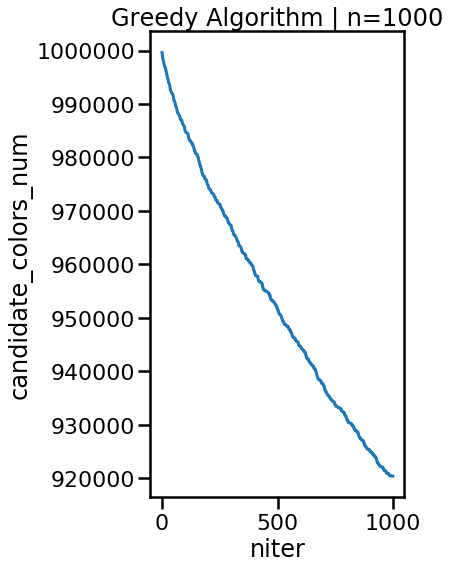

In [16]:
# 1) greedy 알고리즘 적용
solutions = greedy(G, n=len(G))


# 2) 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': np.arange(solutions['iter_num']), 
                                  'colors_used': solutions['color_num_flow']})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='candidate_colors_num', title='Greedy Algorithm | n=1000',
      )
fig.tight_layout();

#### 2) AntCol Algorithm

In [ ]:
# AntCol 적용 
G = nx.Graph(G)
solutions4 = solve(G, num_ants=8, iter=10)

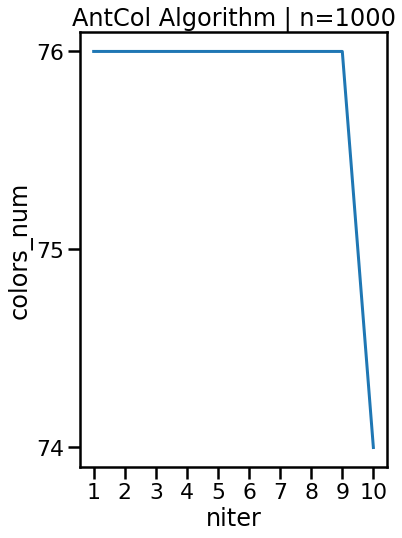

In [ ]:
color_num_flow2 = [
  [76, 77, 77, 76, 77, 77, 77, 76],
  [76, 77, 80, 76, 77, 76, 76, 76],
  [80, 76, 77, 77, 76, 76, 77, 76],
  [77, 79, 77, 77, 76, 76, 76, 76],
  [77, 79, 76, 76, 76, 77, 76, 78],
  [79, 78, 77, 76, 76, 76, 79, 77],
  [77, 76, 76, 76, 76, 76, 77, 76],
  [76, 76, 79, 76, 77, 76, 77, 77],
  [77, 76, 76, 76, 76, 76, 76, 77],
  [76, 74, 77, 76, 76, 76, 76, 77]
  ]

# 수렴 그래프
fig, ax = plt.subplots(figsize=(6,8))

color_num_flow_df = pd.DataFrame({'niter': (np.arange(10)+1).round(0), 
                                  'colors_used': np.min(color_num_flow2, axis=1)})

sns.lineplot(x='niter', y='colors_used', data=color_num_flow_df, ax=ax)
ax.set(ylabel='colors_num', title='AntCol Algorithm | n=1000',
      )
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # x축 숫자 int만 출력
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # y축 숫자 int만 출력
fig.tight_layout();
plt.show();

#### 3) Backtracking Algorithm

In [110]:
Backtracking(G,1000)

Solution exist and Following are the assigned colours:
1 1 2 2 3 4 2 3 1 4 3 5 4 1 2 3 1 3 6 4 7 5 4 5 5 8 7 3 5 6 1 6 6 7 6 7 3 7 8 9 9 5 8 10 5 7 6 5 10 8 10 4 3 1 10 3 10 8 6 2 11 11 7 9 1 12 4 4 8 8 9 13 4 12 13 2 12 11 13 12 8 11 9 2 14 2 11 9 6 10 10 14 15 16 12 16 6 10 3 9 13 2 14 9 9 17 15 6 16 4 15 4 15 3 11 1 17 13 18 17 18 14 16 5 1 19 20 14 3 17 8 7 15 4 12 16 21 13 16 11 7 22 12 11 14 15 19 13 18 2 12 13 22 15 14 17 6 19 10 16 15 5 13 21 19 15 20 22 18 19 17 20 13 21 10 16 23 17 23 1 8 9 20 22 21 20 19 10 18 22 17 15 23 24 20 25 18 24 22 23 14 23 25 21 18 18 12 21 18 24 11 18 20 20 23 11 26 26 19 7 25 26 24 24 25 27 27 27 21 17 14 18 26 5 26 20 28 25 14 27 28 25 21 16 2 29 26 5 29 30 16 15 19 3 25 24 9 19 27 1 28 25 21 15 28 21 27 23 23 31 13 2 27 29 24 30 28 22 26 29 29 12 24 30 17 23 28 31 16 17 32 2 32 1 14 33 31 33 12 34 31 27 30 30 21 32 33 6 33 31 23 34 34 15 35 30 34 30 33 35 15 8 11 28 29 32 22 33 36 31 35 33 35 33 3 29 27 36 24 7 34 37 38 1 36 26 26 36 39 38 18 4 